# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
df = pd.read_csv('MBA_ADMISSIONS.csv')
df

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,Gender,STATE,Previous_Degree,Marital_status,Place_you_belong_to,perceived#Job#Skill,Specialization
0,75.000000,22,71.0,74.8,72.00,61.00,83.333333,Male,Central Zone,Engineering,Single,Urban,prefered skills,Marketing
1,71.666667,25,77.6,82.6,76.90,66.85,76.666667,Male,Central Zone,Engineering,Single,Semi Urban,prefered skills,LOS
2,76.666667,26,93.2,83.8,77.00,74.97,75.000000,Female,Central Zone,Engineering,Single,Urban,desired skills,Finance
3,66.666667,22,91.2,80.0,67.00,68.30,60.000000,Male,Central Zone,Commerce,Single,Semi Urban,prefered skills,Finance
4,71.666667,24,79.8,61.6,60.33,69.28,76.666667,Female,Central Zone,Engineering,Single,Urban,prefered skills,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,71.666667,22,95.0,78.6,75.43,68.54,88.333333,Male,Central Zone,Engineering,Single,Urban,prefered skills,Marketing
469,71.666667,25,77.6,82.6,76.90,66.85,76.666667,Male,Central Zone,Engineering,Single,Semi Urban,prefered skills,LOS
470,76.666667,26,93.2,83.8,77.00,74.97,75.000000,Female,Central Zone,Engineering,Single,Urban,desired skills,Finance
471,66.666667,22,91.2,80.0,67.00,68.30,60.000000,Male,Central Zone,Commerce,Single,Semi Urban,prefered skills,Finance


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pre_score                     473 non-null    float64
 1   Age_in_years                  473 non-null    int64  
 2   Percentage_in_10_Class        473 non-null    float64
 3   Percentage_in_12_Class        473 non-null    float64
 4   Percentage_in_Under_Graduate  473 non-null    float64
 5   percentage_MBA                473 non-null    float64
 6   post_score                    473 non-null    float64
 7   Gender                        473 non-null    object 
 8   STATE                         473 non-null    object 
 9   Previous_Degree               473 non-null    object 
 10  Marital_status                473 non-null    object 
 11  Place_you_belong_to           473 non-null    object 
 12  perceived#Job#Skill           473 non-null    object 
 13  Speci

In [4]:
df_dummies = pd.get_dummies(data=df, columns=['Gender', 'STATE', 'Previous_Degree', 'Marital_status', 'Place_you_belong_to', 'perceived#Job#Skill'], drop_first=True)

df_dummies

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,Specialization,Gender_Male,STATE_East Zone,...,STATE_West Zone,Previous_Degree_Commerce,Previous_Degree_Engineering,Previous_Degree_Management,Previous_Degree_Science,Marital_status_Single,Place_you_belong_to_Semi Urban,Place_you_belong_to_Urban,perceived#Job#Skill_prefered skills,perceived#Job#Skill_required skills
0,75.000000,22,71.0,74.8,72.00,61.00,83.333333,Marketing,1,0,...,0,0,1,0,0,1,0,1,1,0
1,71.666667,25,77.6,82.6,76.90,66.85,76.666667,LOS,1,0,...,0,0,1,0,0,1,1,0,1,0
2,76.666667,26,93.2,83.8,77.00,74.97,75.000000,Finance,0,0,...,0,0,1,0,0,1,0,1,0,0
3,66.666667,22,91.2,80.0,67.00,68.30,60.000000,Finance,1,0,...,0,1,0,0,0,1,1,0,1,0
4,71.666667,24,79.8,61.6,60.33,69.28,76.666667,Finance,0,0,...,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,71.666667,22,95.0,78.6,75.43,68.54,88.333333,Marketing,1,0,...,0,0,1,0,0,1,0,1,1,0
469,71.666667,25,77.6,82.6,76.90,66.85,76.666667,LOS,1,0,...,0,0,1,0,0,1,1,0,1,0
470,76.666667,26,93.2,83.8,77.00,74.97,75.000000,Finance,0,0,...,0,0,1,0,0,1,0,1,0,0
471,66.666667,22,91.2,80.0,67.00,68.30,60.000000,Finance,1,0,...,0,1,0,0,0,1,1,0,1,0


In [5]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   pre_score                            473 non-null    float64
 1   Age_in_years                         473 non-null    int64  
 2   Percentage_in_10_Class               473 non-null    float64
 3   Percentage_in_12_Class               473 non-null    float64
 4   Percentage_in_Under_Graduate         473 non-null    float64
 5   percentage_MBA                       473 non-null    float64
 6   post_score                           473 non-null    float64
 7   Specialization                       473 non-null    object 
 8   Gender_Male                          473 non-null    uint8  
 9   STATE_East Zone                      473 non-null    uint8  
 10  STATE_North East                     473 non-null    uint8  
 11  STATE_North Zone                

In [6]:
y = df_dummies['Specialization']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
df_dummies.drop(['Specialization'], axis=1, inplace=True)
x = df_dummies

scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), index=x.index, columns=x.columns)
x

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,Gender_Male,STATE_East Zone,STATE_North East,...,STATE_West Zone,Previous_Degree_Commerce,Previous_Degree_Engineering,Previous_Degree_Management,Previous_Degree_Science,Marital_status_Single,Place_you_belong_to_Semi Urban,Place_you_belong_to_Urban,perceived#Job#Skill_prefered skills,perceived#Job#Skill_required skills
0,0.642857,0.428571,0.315927,0.393438,0.388889,0.195982,0.820789,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.595238,0.857143,0.488251,0.604935,0.525000,0.482607,0.749104,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.666667,1.000000,0.895561,0.637473,0.527778,0.880451,0.731183,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.523810,0.428571,0.843342,0.534436,0.250000,0.553650,0.569892,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.595238,0.714286,0.545692,0.035521,0.064722,0.601666,0.749104,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,0.595238,0.428571,0.942559,0.496475,0.484167,0.565409,0.874552,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
469,0.595238,0.857143,0.488251,0.604935,0.525000,0.482607,0.749104,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
470,0.666667,1.000000,0.895561,0.637473,0.527778,0.880451,0.731183,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
471,0.523810,0.428571,0.843342,0.534436,0.250000,0.553650,0.569892,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


<AxesSubplot:>

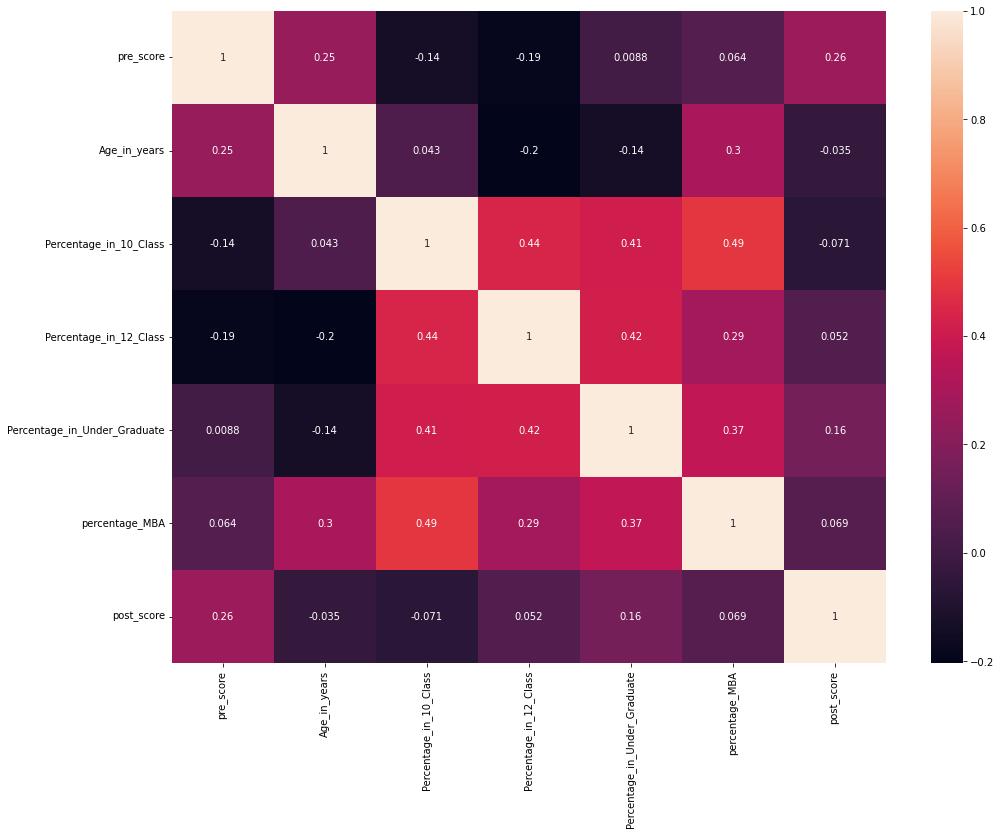

In [7]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(method='pearson'), annot=True)

Optimal number of features : 7


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


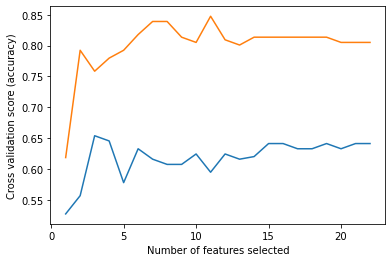

In [8]:
gradient = GradientBoostingClassifier()

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=gradient,
    step=1,
    cv=KFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(x, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [9]:
new_features = rfecv.get_feature_names_out()
list(new_features)

['Age_in_years',
 'Percentage_in_10_Class',
 'Percentage_in_12_Class',
 'Percentage_in_Under_Graduate',
 'percentage_MBA',
 'post_score',
 'Previous_Degree_Engineering']

Optimal number of features : 7


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


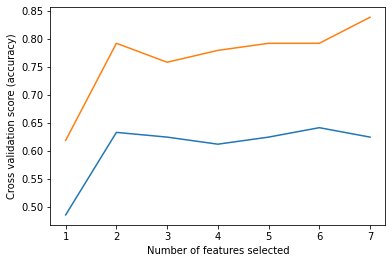

In [10]:
new_features = x[list(new_features)]
    
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=gradient,
    step=1,
    cv=KFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(new_features, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

[12:23:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


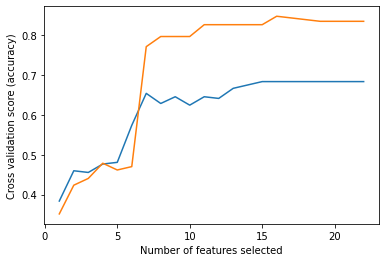

In [11]:
gradient = xgb.XGBClassifier(use_label_encoder=False)
x = df_dummies


min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=gradient,
    step=1,
    cv=KFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(x, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [12]:
new_features = rfecv.get_feature_names_out()
list(new_features)

['pre_score',
 'Age_in_years',
 'Percentage_in_10_Class',
 'Percentage_in_12_Class',
 'Percentage_in_Under_Graduate',
 'percentage_MBA',
 'post_score',
 'Gender_Male',
 'STATE_East Zone',
 'STATE_South Zone',
 'STATE_West Zone',
 'Previous_Degree_Commerce',
 'Previous_Degree_Engineering',
 'Previous_Degree_Science',
 'Marital_status_Single',
 'perceived#Job#Skill_prefered skills']

[12:23:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


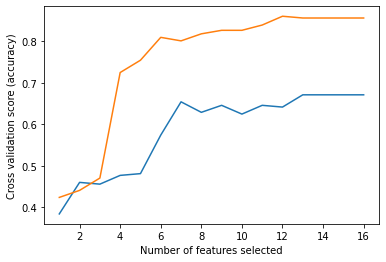

In [13]:
new_features = x[list(new_features)]
gradient = xgb.XGBClassifier(use_label_encoder=False)
    
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=gradient,
    step=1,
    cv=KFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(new_features, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [14]:
new_features = rfecv.get_feature_names_out()
list(new_features)

['pre_score',
 'Age_in_years',
 'Percentage_in_10_Class',
 'percentage_MBA',
 'post_score',
 'Gender_Male',
 'STATE_South Zone',
 'STATE_West Zone',
 'Previous_Degree_Commerce',
 'Previous_Degree_Engineering',
 'Previous_Degree_Science',
 'Marital_status_Single',
 'perceived#Job#Skill_prefered skills']

[12:23:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


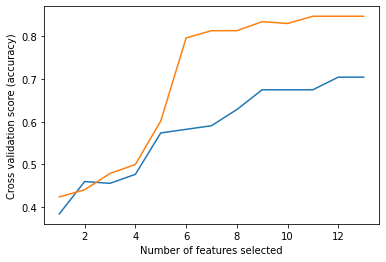

In [15]:
gradient = xgb.XGBClassifier(use_label_encoder=False)

new_features = x[list(new_features)]
    
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=gradient,
    step=1,
    cv=KFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(new_features, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [16]:
new_features = rfecv.get_feature_names_out()
list(new_features)

['pre_score',
 'Age_in_years',
 'Percentage_in_10_Class',
 'percentage_MBA',
 'post_score',
 'Gender_Male',
 'STATE_South Zone',
 'STATE_West Zone',
 'Previous_Degree_Commerce',
 'Previous_Degree_Engineering',
 'Previous_Degree_Science',
 'Marital_status_Single']

[12:24:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<Figure size 1152x864 with 0 Axes>

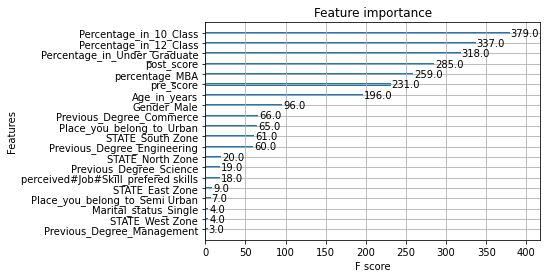

<Figure size 1152x864 with 0 Axes>

In [17]:
gradient.fit(x, y)
xgb.plot_importance(gradient)
plt.figure(figsize=(16, 12))

[12:24:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<Figure size 1152x864 with 0 Axes>

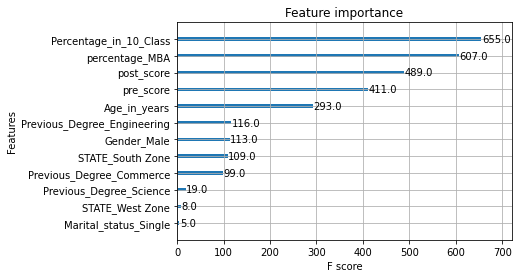

<Figure size 1152x864 with 0 Axes>

In [18]:
new_features=x[list(new_features)]
gradient.fit(new_features, y)
xgb.plot_importance(gradient)
plt.figure(figsize=(16, 12))

[12:24:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


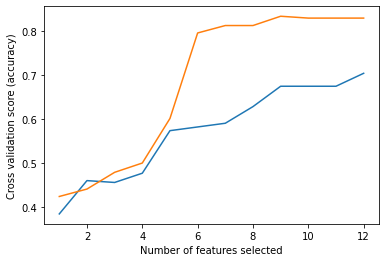

In [19]:
gradient = xgb.XGBClassifier(use_label_encoder=False)

new_features=x[list(new_features)]
d_matrix1 = xgb.DMatrix(data=x.values, label=y)
d_matrix2 = xgb.DMatrix(data=new_features.values, label=y)

x = df_dummies

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=gradient,
    step=1,
    cv=KFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(new_features, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

# MODEL

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6)

In [22]:
gradient.fit(x_train, y_train)
pred = gradient.predict(x_test)

[12:24:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [23]:
print('test score: ', accuracy_score(y_test, pred))
print('train score: ', gradient.score(x_train, y_train))

test score:  0.9
train score:  1.0


In [24]:
gradient = xgb.XGBClassifier(
    use_label_encoder=False,
    booster='gbtree',
    n_jobs=-1,
    n_estimators=500,
    eta=0.2,
    gamma=4,
    max_depth=5,
    min_child_weight=3,
    subsample=0.5,
    reg_lambda=1.5,
    reg_alpha=1.5,
    tree_method='auto',
    objective='reg:squarederror',
    eval_metric='mlogloss'

)
gradient

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eta=0.2, eval_metric='mlogloss',
              gamma=4, gpu_id=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              max_delta_step=None, max_depth=5, min_child_weight=3, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, objective='reg:squarederror',
              predictor=None, random_state=None, reg_alpha=1.5, reg_lambda=1.5,
              scale_pos_weight=None, subsample=0.5, tree_method='auto',
              use_label_encoder=False, ...)

In [25]:
gradient.fit(x_train, y_train)
gradient.predict(x_test)
print('Accuracy Score: {}%\nError Score: {}%'.format(round((accuracy_score(y_test, pred) * 100), 2), round(100 - (accuracy_score(y_test, pred) * 100), 2)))

Accuracy Score: 90.0%
Error Score: 10.0%


In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84        63
           1       1.00      1.00      1.00        16
           2       0.90      0.93      0.91        46
           3       0.89      0.95      0.92        65

    accuracy                           0.90       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.90      0.90      0.90       190



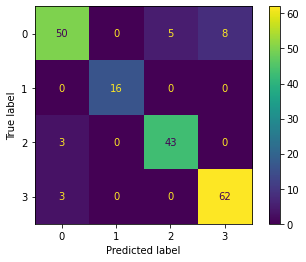

<Figure size 3888x3168 with 0 Axes>

In [27]:

cm = confusion_matrix(y_test, pred, labels=gradient.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gradient.classes_)
display.plot()
plt.figure(figsize=(54, 44))
plt.show()